<a href="https://colab.research.google.com/github/salexashenko/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [24]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
import math
import numpy as np
def find_mean(numbers):
  return sum(numbers) / len(numbers) 
print(find_mean(sales))
def find_variance(numbers):
  var_res = sum((x - find_mean(numbers)) ** 2 for x in numbers) / len(numbers)
  return var_res
print(find_variance(sales))
def find_stdev(numbers):
  st=math.sqrt(find_variance(numbers))
  return st
print(find_stdev(sales))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [28]:
customers=[127, 80, 105, 92, 120, 115, 93]
import numpy as np
np.cov(sales,customers)[0][1]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [35]:
print(find_stdev(customers))
#standardized_sales=(np.array(sales)-find_mean(sales))/find_stdev(sales)
#standardized_customers=(np.array(customers)-find_mean(customers))/find_stdev(customers)
print(np.cov(sales,customers)[0][1]/(np.std(sales)*np.std(customers)))
print(np.corrcoef(sales,customers)[0][1])


###NEEDS WORK IDK WHAT

15.792015549069118
1.123306307450706
0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [37]:
import pandas as pd 
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

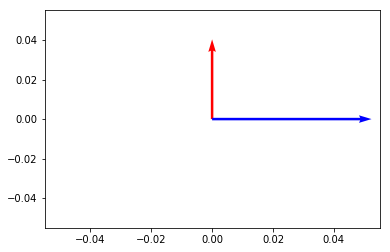

In [40]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[0,5],[10,0]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [41]:
a=[-5,3,7]
b=[6,-8,2]
np.dot(a,b)
#No. The dot product does not equal zero

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [43]:
c=[2, -15, 6, 20]
print(np.linalg.norm(c))
print(np.dot(c,c))
print(np.matmul(np.transpose(c),c))

25.787593916455254
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d=7\hat{i}+12\hat{j}$

$e=2\hat{i}+11\hat{j}-8\hat{k}$


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [46]:
f=np.array([4,12,11,9,2])
f_hat = f / (f**2).sum()**0.5
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

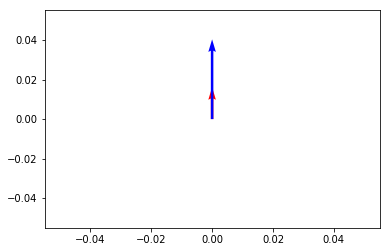

In [48]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[0,2],[0,5]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

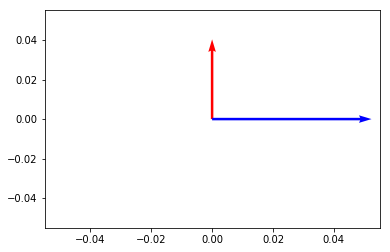

In [49]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[0,5],[10,0]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#The line that these vectors are on

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [52]:
X = np.matrix('1 2 3; -1 0 7; 4 8 2')
print(np.linalg.det(X))
#Their span is R3, the space that they are in.

-19.999999999999996


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



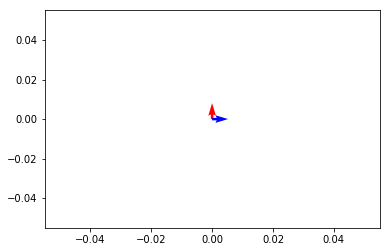

In [53]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[0,1],[1,0]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

## 6.2 What does it mean to form a basis?

It means defining linearly independent vectors that span the required space
 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [54]:
P=np.matrix('1 2 3; -1 0 7; 4 8 2')
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

How many dimensions it spans


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


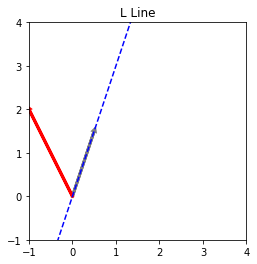

In [59]:
# Plot a line
v=[1,3]
w=[-1,2]
projlw=np.multiply(np.dot(w,v)/np.dot(v,v),v)

plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()
plt.axes().set_aspect('equal')
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals
plt.arrow(0, 0, projlw[0], projlw[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.plot(x_vals, y_vals, '--', color='b')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.title("L Line")
plt.show()




# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

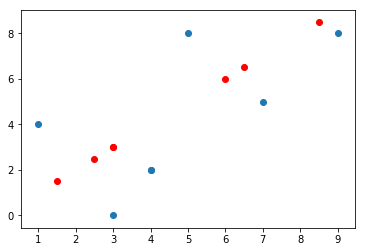

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]
def projection(x,y):
  w=[x,y]
  v=[1,1]
  return np.multiply(np.dot(w,v)/np.dot(v,v),v)



data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)
for i in range (7):
  plt.scatter(projection(x_values[i],y_values[i])[0],projection(x_values[i],y_values[i])[1], c='red')
df.head()

plt.scatter(df.x, df.y)
plt.show()